# Outlier detection in SMACOF solutions

In [1]:
from scripts.ClusterTS_MDS import ClusterMDS

import numpy as np
from sklearn.metrics.cluster import calinski_harabasz_score, davies_bouldin_score
from sklearn.cluster import HDBSCAN

from matplotlib.pyplot import subplots, show
from matplotlib import rcParams
from matplotlib.animation import FuncAnimation

rcParams.update({
    "text.usetex": True
})

%matplotlib ipympl 

In [2]:
PTEX_dissim = np.loadtxt("./data/PTEX_DTW_matrix.dat", dtype= np.float64, delimiter = ",")
PTEX_dissim.shape

(4313, 4313)

SMACOF-dissim-classic with 2 components has a stress-1 value of 0.102424


np.float64(0.1024239677623428)

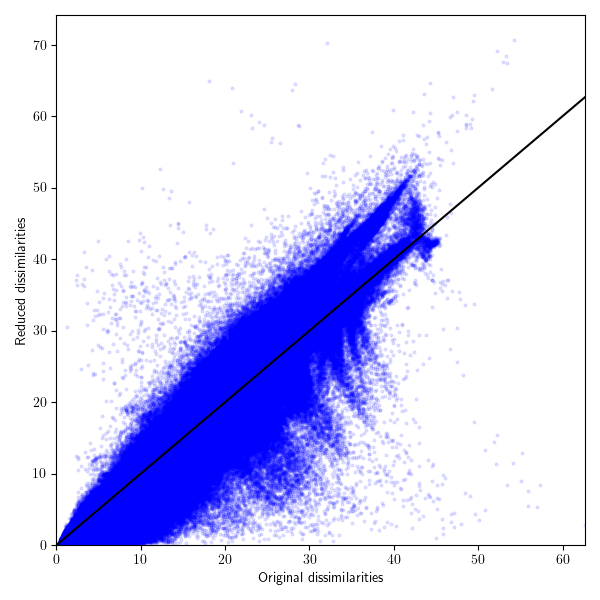

In [3]:
TEC_ClusterSeries = ClusterMDS(dissimilarity = PTEX_dissim)
TEC_ClusterSeries.ComputeMDS(num_comps_mds = 2, method = "SMACOF-dissim-classic", max_iter = 1000, eps = 1e-6, verbose = 0)

In [4]:
min_cluster_size_list = tuple(range(5, 55, 5))
CH_cluster_scores = [0]*len(min_cluster_size_list)
DB_cluster_scores = [0]*len(min_cluster_size_list)
number_found_clusters = [0]*len(min_cluster_size_list)

for k, num_samples in enumerate(min_cluster_size_list):
    HDBSCAN_Out = HDBSCAN(min_cluster_size = num_samples).fit(TEC_ClusterSeries.Xc_TS)
    CH_cluster_scores[k] = calinski_harabasz_score(TEC_ClusterSeries.Xc_TS, HDBSCAN_Out.labels_)
    DB_cluster_scores[k] = davies_bouldin_score(TEC_ClusterSeries.Xc_TS, HDBSCAN_Out.labels_)
    number_found_clusters[k] = len(np.unique(HDBSCAN_Out.labels_))

maximum_CH_index = np.argmax(CH_cluster_scores)
minimum_DB_index = np.argmin(DB_cluster_scores)
print("Optimal number of neighbours by CH score: ", min_cluster_size_list[maximum_CH_index])
print("Number of clusters given by maximum CH score: ", number_found_clusters[maximum_CH_index])
print("Optimal number of neighbours by DB score: ", min_cluster_size_list[minimum_DB_index])
print("Number of clusters given by minimum CH score: ", number_found_clusters[minimum_DB_index])

Optimal number of neighbours by CH score:  30
Number of clusters given by maximum CH score:  4
Optimal number of neighbours by DB score:  5
Number of clusters given by minimum CH score:  95


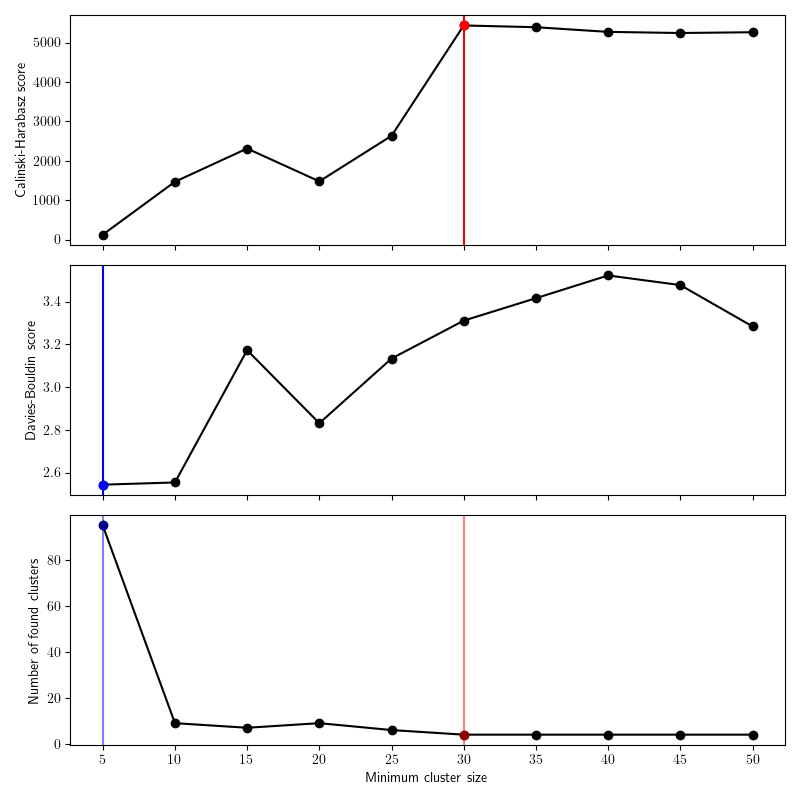

In [5]:
Figure, Subplot = subplots(3, 1, figsize = (8, 8), sharex = "col")

Subplot[0].axvline(min_cluster_size_list[maximum_CH_index], color = "red", zorder = 0)
Subplot[0].plot(min_cluster_size_list, CH_cluster_scores, "-ok", zorder = 1)
Subplot[0].scatter(min_cluster_size_list[maximum_CH_index], CH_cluster_scores[maximum_CH_index], c = "red", marker = "o", zorder = 2)

Subplot[1].axvline(min_cluster_size_list[minimum_DB_index], color = "blue", zorder = 0)
Subplot[1].plot(min_cluster_size_list, DB_cluster_scores, "-ok", zorder = 1)
Subplot[1].scatter(min_cluster_size_list[minimum_DB_index], DB_cluster_scores[minimum_DB_index], c = "blue", marker = "o", zorder = 2)

Subplot[2].axvline(min_cluster_size_list[minimum_DB_index], color = "blue", zorder = 0, alpha = 0.5)
Subplot[2].axvline(min_cluster_size_list[maximum_CH_index], color = "red", zorder = 0, alpha = 0.5)
Subplot[2].plot(min_cluster_size_list, number_found_clusters, "-ok", zorder = 1)
Subplot[2].scatter(min_cluster_size_list[maximum_CH_index], number_found_clusters[maximum_CH_index], c = "red", marker = "o", zorder = 2, alpha = 0.5)
Subplot[2].scatter(min_cluster_size_list[minimum_DB_index], number_found_clusters[minimum_DB_index], c = "blue", marker = "o", zorder = 2, alpha = 0.5)


Subplot[0].set_ylabel("Calinski-Harabasz score")
Subplot[1].set_ylabel("Davies-Bouldin score")
Subplot[2].set_ylabel("Number of found clusters")
Subplot[2].set_xlabel("Minimum cluster size")
Subplot[2].set_xticks(min_cluster_size_list)

Figure.tight_layout()

interactive(children=(IntSlider(value=5, description='Min Cluster Size', max=50, min=5), Output()), _dom_class…

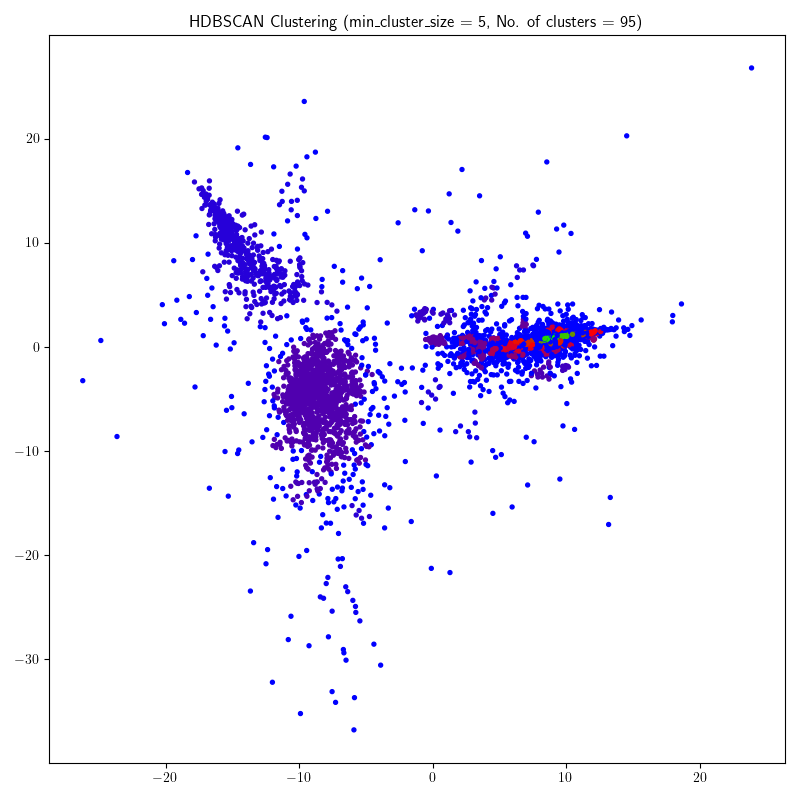

In [6]:
from ipywidgets import interact, IntSlider

# Set up the figure
fig, ax = subplots(figsize=(8, 8))
sc = ax.scatter(TEC_ClusterSeries.Xc_TS[:, 0], TEC_ClusterSeries.Xc_TS[:, 1], fc = "gray", s=8)
sc.set_cmap("brg")
title = ax.set_title("HDBSCAN Clustering")
fig.tight_layout()

# Function to update the plot based on slider value
def update(min_cluster_size):
    cluster_labels = HDBSCAN(min_cluster_size = min_cluster_size).fit_predict(TEC_ClusterSeries.Xc_TS)
    
    # Update scatter plot colors
    sc.set_array(cluster_labels)
    sc.set_clim(vmin=min(cluster_labels), vmax=max(cluster_labels))  # Adjust color limits
    title.set_text(f"HDBSCAN Clustering (min_cluster_size = {min_cluster_size}, No. of clusters = {len(np.unique(cluster_labels))})")
    fig.canvas.draw_idle()

# Create an interactive slider
min_cluster_size_slider = IntSlider(
    value=min_cluster_size_list[0],
    min=min(min_cluster_size_list),
    max=max(min_cluster_size_list),
    step=1,
    description='Min Cluster Size'
)

# Link the slider to the update function
interact(update, min_cluster_size=min_cluster_size_slider)
show()